In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os
from matplotlib.patches import Patch
import seaborn as sns

---

# DATA PROCESS

---

**DATASET 1 (1997-2025)**

We used the first dataset to obtain information about the educational level of the population in the different neighborhoods and districts of Barcelona.

In [285]:
# We put all datasets on a list
all_files=[]
for year in range(1997,2026): # 1997-2025
    all_files.append(f'{year}_education_level.csv')

# We read all datasets and prepare them
df_list=[]
for file in all_files:

    df=pd.read_csv(file, sep=',')

    # We delete the '..' from the column 'Value'
    df['Value']=pd.to_numeric(df['Value'], errors='coerce') # We change '..' to NaN
    df=df.dropna(subset=['Value']) # We delete the NaN
    
    df_list.append(df)

# We combine all dataframes in one
education_df=pd.concat(df_list, ignore_index=True)

# We save the clean dataset
education_df.to_csv('education_1997-2025.csv', index=False, encoding='utf-8')
education_df

Year_Reference      District         Neighborhood   Value  \
0                1997  Ciutat Vella             el Raval  2369.0   
1                1997  Ciutat Vella             el Raval   601.0   
2                1997  Ciutat Vella             el Raval  4241.0   
3                1997  Ciutat Vella             el Raval    57.0   
4                1997  Ciutat Vella             el Raval   540.0   
...               ...           ...                  ...     ...   
59760            2025    Sant Martí  la Verneda i la Pau   550.0   
59761            2025    Sant Martí  la Verneda i la Pau   269.0   
59762            2025    Sant Martí  la Verneda i la Pau  2222.0   
59763            2025    Sant Martí  la Verneda i la Pau    31.0   
59764            2025    Sant Martí  la Verneda i la Pau     8.0   

                   Education_Level             Birth_Place  
0      Less than primary education       City of Barcelona  
1      Less than primary education       Rest of Catalonia  
2      Less than primary education           Rest of Spain  
3      Less than primary education  Rest of European Union  
4      Less than primary education           Rest of World  
...                            ...                     ...  
59760           Tertiary education           Rest of Spain  
59761           Tertiary education  Rest of European Union  
59762           Tertiary education           Rest of World  
59763                Not available       City of Barcelona  
59764                Not available           Rest of World  

[59765 rows x 6 columns]

**DATASET 2 (2015-2022)**

This second dataset provides information about some socioeconomic indices in the different neighborhoods of Barcelona.

In [286]:
# We put all datasets on a list
all_files=[]
for year in range(2015,2023): # 2015-2022
    all_files.append(f'ist-14075-15023-mun_{year}.csv')

# We read all datasets and clean them
df_list=[]
for file in all_files:

    df=pd.read_csv(file, sep=';', decimal=',')

    # We delete the column 'estado' because it doesn't have values, and 'municipio' because we already know that we are in Barcelona
    df.drop(columns=['municipio','estado'], inplace=True)

    # We change column 'valor' to numeric
    df['valor']=pd.to_numeric(df['valor'].astype(str).str.replace(',', '.'), errors='coerce')

    # Let's change the indicators of 'concepto' into columns. This will agrupate the neighborhoods instead of having them repeat
    df=df.pivot_table(
        index=['año', 'barrios de Barcelona'], 
        columns='concepto', 
        values='valor'
    ).reset_index()   
    df.columns.name=None

    # We are going to delete the columns of 'población con estudios bajos' and 'población joven sin estudios postobligatorios', as this information
    # is incomplete for some years and we have it in other datasets 
    columns=['población con estudios bajos (%)', 'población joven sin estudios postobligatorios (%)'] # Columns we want to delete
    existing_columns=[] # Let's check if they exist, and delete them in that case
    for col in columns:
        if col in df.columns:          
            existing_columns.append(col)  
    if existing_columns:
        df.drop(columns=existing_columns, inplace=True)

    df_list.append(df)

# We combine all dataframes in one
indices_df=pd.concat(df_list, ignore_index=True)

# We save the clean dataset
indices_df.to_csv('indices_2015-2022.csv', index=False, encoding='utf-8')
indices_df

año barrios de Barcelona  \
0    2015        Baró de Viver   
1    2015             Can Baró   
2    2015          Can Peguera   
3    2015            Canyelles   
4    2015     Ciutat Meridiana   
..    ...                  ...   
587  2022    la Vila de Gràcia   
588  2022            les Corts   
589  2022         les Roquetes   
590  2022      les Tres Torres   
591  2022                total   

     extranjeros de países de renta baja o media (%)  población ocupada (%)  \
0                                                9.6                   45.7   
1                                                8.9                   60.6   
2                                                5.6                   46.0   
3                                                3.4                   59.3   
4                                               26.7                   47.8   
..                                               ...                    ...   
587                                              9.6                   68.2   
588                                              7.7                   68.6   
589                                             21.1                   60.5   
590                                              4.3                   66.9   
591                                             12.9                   65.6   

     renta media por persona (€)  trabajadores de baja calificación (%)  
0                         8036.0                                   22.9  
1                        13555.0                                    9.2  
2                         9029.0                                   18.8  
3                        12377.0                                   14.4  
4                         7687.0                                   27.7  
..                           ...                                    ...  
587                      19570.0                                    3.9  
588                      23381.0                                    3.7  
589                      10946.0                                   21.0  
590                      33382.0                                    2.2  
591                      18404.0                                    7.6  

[592 rows x 6 columns]

**DATASET 3 (1997-2025)**

This last dataset gives us information about the educational level of the population in each district, classifying them by the continent where they were born.

In [287]:
# We read the dataset

df=pd.read_csv('nivel_educativo_continentes.csv', sep=',')
df

Territorio  Tipo de territorio  \
0   Territorio  Tipo de territorio   
1    Barcelona            Municipi   
2    Barcelona            Municipi   
3    Barcelona            Municipi   
4    Barcelona            Municipi   
..         ...                 ...   
62  Sant Martí           Districte   
63  Sant Martí           Districte   
64  Sant Martí           Districte   
65  Sant Martí           Districte   
66  Sant Martí           Districte   

                                 Titulación académica 01 ene 1997  \
0                                Titulación académica      África   
1                                        Sin estudios        1328   
2   Estudios primarios, certificado de escolaridad...        2139   
3   Bachillerato elemental, graduado escolar, ESO,...        1027   
4   Bachillerato superior, BUP, COU, FPII, CFGM gr...        1411   
..                                                ...         ...   
62  Estudios primarios, certificado de escolaridad...         265   
63  Bachillerato elemental, graduado escolar, ESO,...         169   
64  Bachillerato superior, BUP, COU, FPII, CFGM gr...         150   
65       Estudios universitarios, CFGS grado superior          98   
66                                          No consta          44   

   01 ene 1997.1 01 ene 1997.2 01 ene 1997.3 01 ene 1997.4 01 ene 1997.5  \
0        América          Asia        Europa       Oceania     No consta   
1            901           403        196617             -             -   
2           3148          1168        333835             -            14   
3           2510           531        235277             5            10   
4           6516          1419        268125            28            24   
..           ...           ...           ...           ...           ...   
62           349            66         50462             -             -   
63           314            33         36970             -             -   
64           698            83         33327             -             -   
65           449            81         17508             -             5   
66           122            26          4386             -             -   

   01 ene 1998  ... 01 ene 2024.2 01 ene 2024.3 01 ene 2024.4 01 ene 2024.5  \
0       África  ...          Asia        Europa       Oceania     No consta   
1         1510  ...           373         16532             -             -   
2         2505  ...         25914        153040            28            34   
3         1105  ...         28006        233800            62            39   
4         1565  ...         16409        272394           166            84   
..         ...  ...           ...           ...           ...           ...   
62         327  ...          3925         26522             -            10   
63         181  ...          4044         40362            13             -   
64         169  ...          2185         40458            13             9   
65         113  ...          3351         49775            90            38   
66          34  ...            14           128             -             -   

   01 ene 2025 01 ene 2025.1 01 ene 2025.2 01 ene 2025.3 01 ene 2025.4  \
0       África       América          Asia        Europa       Oceanía   
1          300           178           429         14114             -   
2        12331         25868         27068        152733            40   
3        12606         63612         31217        227241            68   
4         8450         93999         18597        270442           180   
..         ...           ...           ...           ...           ...   
62        1926          3275          4080         26285             5   
63        1873          8105          4480         39337            11   
64        1169         12530          2552         40344            17   
65        1103         17044          3876         51122           105   
66           -            36            15

In [288]:
# We delete the raws of all Barcelona because we are interested in the districts
df=df[df['Territorio']!='Barcelona'].copy()

# We also delete the column 'Tipo de territorio' because all of them are districts, and the 'No consta' ones because they are neglectable
df=df.drop('Tipo de territorio', axis=1)
df

Territorio                               Titulación académica  \
0     Territorio                               Titulación académica   
7   Ciutat Vella                                       Sin estudios   
8   Ciutat Vella  Estudios primarios, certificado de escolaridad...   
9   Ciutat Vella  Bachillerato elemental, graduado escolar, ESO,...   
10  Ciutat Vella  Bachillerato superior, BUP, COU, FPII, CFGM gr...   
..           ...                                                ...   
62    Sant Martí  Estudios primarios, certificado de escolaridad...   
63    Sant Martí  Bachillerato elemental, graduado escolar, ESO,...   
64    Sant Martí  Bachillerato superior, BUP, COU, FPII, CFGM gr...   
65    Sant Martí       Estudios universitarios, CFGS grado superior   
66    Sant Martí                                          No consta   

   01 ene 1997 01 ene 1997.1 01 ene 1997.2 01 ene 1997.3 01 ene 1997.4  \
0       África       América          Asia        Europa       Oceania   
7          641           136           227         16474             -   
8          620           451           565         23440             -   
9          129           249           193         11077             -   
10         197           614           422          9578             5   
..         ...           ...           ...           ...           ...   
62         265           349            66         50462             -   
63         169           314            33         36970             -   
64         150           698            83         33327             -   
65          98           449            81         17508             -   
66          44           122            26          4386             -   

   01 ene 1997.5 01 ene 1998 01 ene 1998.1  ... 01 ene 2024.2 01 ene 2024.3  \
0      No consta      África       América  ...          Asia        Europa   
7              -         762           156  ...            99           687   
8              -         734           566  ...          8040          7452   
9              -         144           278  ...          8492         10340   
10             -         233           733  ...          3632         10774   
..           ...         ...           ...  ...           ...           ...   
62             -         327           420  ...          3925         26522   
63             -         181           345  ...          4044         40362   
64             -         169           795  ...          2185         40458   
65             5         113           518  ...          3351         49775   
66             -          34           118  ...            14           128   

   01 ene 2024.4 01 ene 2024.5 01 ene 2025 01 ene 2025.1 01 ene 2025.2  \
0        Oceania     No consta      África       América          Asia   
7              -             -          60             6           104   
8              5             -        2473          1458          8309   
9             15             6        2452          3835          9451   
10            51             8        1503          6694          4079   
..           ...           ...         ...           ...           ...   
62             -            10        1926          3275          4080   
63            13             -        1873          8105          4480   
64            13             9        1169         12530          2552   
65            90            38        1103         17044          3876   
66             -             -           -            36            15   

   01 ene 2025.3 01 ene 2025.4 01 ene 2025.5  
0         Europa       Oceanía     No consta  
7            560             -             -  
8           7343             7             -  
9          10278            11             6  
10         10787            52            10  
..           ...           ...           ...  
62         26285             5            12  
63         39337            11             -  
64 

In [289]:
# Wee will mantain the first two columns and modificate all the others
old_columns=['Territorio', 'Titulación académica']

columns_to_modificate=[]
for col in df.columns:
    if col not in old_columns:
        columns_to_modificate.append(col)

# We put all the columns in one
df=df.melt(
    id_vars=old_columns, # We mantain these ones
    value_vars=columns_to_modificate, # Each column generates a new row for each original row
    var_name='Columna_Original', # Name of the new column where the original columns are 
    value_name='Poblacion' # Column with the values
)
df

Territorio                               Titulación académica  \
0        Territorio                               Titulación académica   
1      Ciutat Vella                                       Sin estudios   
2      Ciutat Vella  Estudios primarios, certificado de escolaridad...   
3      Ciutat Vella  Bachillerato elemental, graduado escolar, ESO,...   
4      Ciutat Vella  Bachillerato superior, BUP, COU, FPII, CFGM gr...   
...             ...                                                ...   
10609    Sant Martí  Estudios primarios, certificado de escolaridad...   
10610    Sant Martí  Bachillerato elemental, graduado escolar, ESO,...   
10611    Sant Martí  Bachillerato superior, BUP, COU, FPII, CFGM gr...   
10612    Sant Martí       Estudios universitarios, CFGS grado superior   
10613    Sant Martí                                          No consta   

      Columna_Original Poblacion  
0          01 ene 1997    África  
1          01 ene 1997       641  
2          01 ene 1997       620  
3          01 ene 1997       129  
4          01 ene 1997       197  
...                ...       ...  
10609    01 ene 2025.5        12  
10610    01 ene 2025.5         -  
10611    01 ene 2025.5         8  
10612    01 ene 2025.5        37  
10613    01 ene 2025.5         -  

[10614 rows x 4 columns]

In [290]:
# We clean the values
df['Poblacion']=df['Poblacion'].replace(['-', ''], np.nan)
df['Poblacion']=pd.to_numeric(df['Poblacion'], errors='coerce')

# We create an array with the values of Columna_Original (without repeating)
unique_columns=df['Columna_Original'].unique()

# Let's reconstruct the dataframe (we just reconstruct over the second column)
columns_df=pd.DataFrame({
        'Columna_Original': unique_columns,
        'Orden_Original': range(len(unique_columns))
    })

# Each date has 6 columns (one for each continent)
n_continents=6
columns_df['Grupo']=columns_df['Orden_Original']//n_continents # Each group is a date
columns_df['Posicion_Grupo']=columns_df['Orden_Original']%n_continents # Position in the group
map_continents={
        0: 'África', 1: 'América', 2: 'Asia', 
        3: 'Europa', 4: 'Oceanía', 5: 'No consta'
    }

# Extract continents
columns_df['Continente'] = columns_df['Posicion_Grupo'].map(map_continents)

# Extract dates
dates=columns_df.groupby('Grupo')['Columna_Original'].first().tolist()
columns_df['Fecha'] = columns_df['Grupo'].map(lambda x: dates[x])

# Let's add them to the original df
final_map=columns_df.set_index('Columna_Original')[['Fecha', 'Continente']].to_dict('index')
df['Fecha']=df['Columna_Original'].map(lambda x: final_map[x]['Fecha'])
df['Continente']=df['Columna_Original'].map(lambda x: final_map[x]['Continente'])

#Extract the year
df['Año']=df['Fecha'].str.extract(r'(\d{4})').astype(float)

# We clean data again
df=df.dropna(subset=['Poblacion'])
df

Territorio                               Titulación académica  \
1      Ciutat Vella                                       Sin estudios   
2      Ciutat Vella  Estudios primarios, certificado de escolaridad...   
3      Ciutat Vella  Bachillerato elemental, graduado escolar, ESO,...   
4      Ciutat Vella  Bachillerato superior, BUP, COU, FPII, CFGM gr...   
5      Ciutat Vella       Estudios universitarios, CFGS grado superior   
...             ...                                                ...   
10605   Sant Andreu  Bachillerato superior, BUP, COU, FPII, CFGM gr...   
10606   Sant Andreu       Estudios universitarios, CFGS grado superior   
10609    Sant Martí  Estudios primarios, certificado de escolaridad...   
10611    Sant Martí  Bachillerato superior, BUP, COU, FPII, CFGM gr...   
10612    Sant Martí       Estudios universitarios, CFGS grado superior   

      Columna_Original  Poblacion        Fecha Continente     Año  
1          01 ene 1997      641.0  01 ene 1997     África  1997.0  
2          01 ene 1997      620.0  01 ene 1997     África  1997.0  
3          01 ene 1997      129.0  01 ene 1997     África  1997.0  
4          01 ene 1997      197.0  01 ene 1997     África  1997.0  
5          01 ene 1997       73.0  01 ene 1997     África  1997.0  
...                ...        ...          ...        ...     ...  
10605    01 ene 2025.5       10.0  01 ene 2025  No consta  2025.0  
10606    01 ene 2025.5       14.0  01 ene 2025  No consta  2025.0  
10609    01 ene 2025.5       12.0  01 ene 2025  No consta  2025.0  
10611    01 ene 2025.5        8.0  01 ene 2025  No consta  2025.0  
10612    01 ene 2025.5       37.0  01 ene 2025  No consta  2025.0  

[8016 rows x 7 columns]

In [291]:
# We can now delete Columna_Original and Fecha, as they are repeated information
df=df.drop(['Columna_Original','Fecha'], axis=1)

# We save our dataframe
df.to_csv('education_continents_1997-2025.csv', index=False, encoding='utf-8')
df

Territorio                               Titulación académica  \
1      Ciutat Vella                                       Sin estudios   
2      Ciutat Vella  Estudios primarios, certificado de escolaridad...   
3      Ciutat Vella  Bachillerato elemental, graduado escolar, ESO,...   
4      Ciutat Vella  Bachillerato superior, BUP, COU, FPII, CFGM gr...   
5      Ciutat Vella       Estudios universitarios, CFGS grado superior   
...             ...                                                ...   
10605   Sant Andreu  Bachillerato superior, BUP, COU, FPII, CFGM gr...   
10606   Sant Andreu       Estudios universitarios, CFGS grado superior   
10609    Sant Martí  Estudios primarios, certificado de escolaridad...   
10611    Sant Martí  Bachillerato superior, BUP, COU, FPII, CFGM gr...   
10612    Sant Martí       Estudios universitarios, CFGS grado superior   

       Poblacion Continente     Año  
1          641.0     África  1997.0  
2          620.0     África  1997.0  
3          129.0     África  1997.0  
4          197.0     África  1997.0  
5           73.0     África  1997.0  
...          ...        ...     ...  
10605       10.0  No consta  2025.0  
10606       14.0  No consta  2025.0  
10609       12.0  No consta  2025.0  
10611        8.0  No consta  2025.0  
10612       37.0  No consta  2025.0  

[8016 rows x 5 columns]

---

# PLOTS

---

### 1. BUBBLE CHART

From the dataset one, we need to extract: 
- % of total people with postmandatory studies in each neighborhood.
- % of inmigrants with postmandatory studies in each neighborhood.

In [292]:
# We are interested on postmandatory studies, so let's define what they are
postmandatory_studies=['Upper secondary or post-secondary non-tertiary education', 'Tertiary education']

# Let's define inmigrants (out of Spain)
inmigrant_types=['Rest of European Union', 'Rest of World']

# Let's obtain the total population in each neighborhood
total_pop=education_df.groupby(['Year_Reference', 'District', 'Neighborhood'])['Value'].sum().reset_index()
total_pop.columns=['Year_Reference', 'District', 'Neighborhood', 'Total_Population']

# Let's obtain how many of these people have postmandatory studies
postmandatory=education_df[education_df['Education_Level'].isin(postmandatory_studies)] # We find the studies
postmandatory_total=postmandatory.groupby(['Year_Reference', 'District', 'Neighborhood'])['Value'].sum().reset_index() # We group by neighborhoods
postmandatory_total.columns=['Year_Reference', 'District', 'Neighborhood', 'Total_Postmandatory']

# Let's obtain the total inmigrants in each neighborhood
inmigrants=education_df[education_df['Birth_Place'].isin(inmigrant_types)] # We find the inmigrants
total_inmigrants=inmigrants.groupby(['Year_Reference', 'District', 'Neighborhood'])['Value'].sum().reset_index() # We group by neighborhoods
total_inmigrants.columns = ['Year_Reference', 'District', 'Neighborhood', 'Total_Inmigrants']

# Now, how many inmigrants have postmandatory studies
postmandatory_inmigrants=inmigrants[inmigrants['Education_Level'].isin(postmandatory_studies)] # We find the studies
postmandatory_inmigrants=postmandatory_inmigrants.groupby(['Year_Reference', 'District', 'Neighborhood'])['Value'].sum().reset_index() # We group by neighborhoods
postmandatory_inmigrants.columns=['Year_Reference', 'District', 'Neighborhood', 'Postmandatory_Inmigrants']

# Combine everything in the same DataFrame
percentages=total_pop.merge(postmandatory_total, on=['Year_Reference', 'District', 'Neighborhood'])
percentages=percentages.merge(postmandatory_inmigrants, on=['Year_Reference', 'District', 'Neighborhood'], how='left')
percentages=percentages.merge(total_inmigrants, on=['Year_Reference', 'District', 'Neighborhood'], how='left')

# Obtain percentages
percentages['Percentage_Postmandatory']=(percentages['Total_Postmandatory']/percentages['Total_Population'])*100
percentages['Percentage_Postmandatory_Inmigrants']=(percentages['Postmandatory_Inmigrants']/percentages['Total_Inmigrants'])*100

# Clean NaN from percentages: Refill with zero, the NaN is caused because there are no inmigrants
percentages['Percentage_Postmandatory_Inmigrants']=percentages['Percentage_Postmandatory_Inmigrants'].fillna(0)

# We save the dataset 
percentages.to_csv('education_percentages_1997-2025.csv', index=False, encoding='utf-8')
percentages

Year_Reference             District  \
0               1997         Ciutat Vella   
1               1997         Ciutat Vella   
2               1997         Ciutat Vella   
3               1997         Ciutat Vella   
4               1997             Eixample   
...              ...                  ...   
2112            2025  Sarrià-Sant Gervasi   
2113            2025  Sarrià-Sant Gervasi   
2114            2025  Sarrià-Sant Gervasi   
2115            2025  Sarrià-Sant Gervasi   
2116            2025  Sarrià-Sant Gervasi   

                               Neighborhood  Total_Population  \
0     Sant Pere, Santa Caterina i la Ribera           17854.0   
1                            el Barri Gòtic           12255.0   
2                                  el Raval           30337.0   
3                            la Barceloneta           13098.0   
4                               Sant Antoni           32270.0   
...                                     ...               ...   
2112             Sant Gervasi - la Bonanova           22690.0   
2113                                 Sarrià           21032.0   
2114  Vallvidrera, el Tibidabo i les Planes            4150.0   
2115                   el Putxet i el Farró           26503.0   
2116                        les Tres Torres           13655.0   

      Total_Postmandatory  Postmandatory_Inmigrants  Total_Inmigrants  \
0                  5082.0                     697.0            1728.0   
1                  4054.0                     554.0            1184.0   
2                  6067.0                    1164.0            3542.0   
3                  2089.0                     184.0             543.0   
4                 13088.0                     728.0            1293.0   
...                   ...                       ...               ...   
2112              18493.0                    4586.0            5722.0   
2113              16868.0                    4107.0            5043.0   
2114               3010.0                     862.0            1089.0   
2115              21680.0                    6522.0            7790.0   
2116              11404.0                    2206.0            2731.0   

      Percentage_Postmandatory  Percentage_Postmandatory_Inmigrants  
0                    28.464210                            40.335648  
1                    33.080375                            46.790541  
2                    19.998681                            32.862789  
3                    15.949000                            33.885820  
4                    40.557794                            56.303171  
...                        ...                                  ...  
2112                 81.502865                            80.146802  
2113                 80.201598                            81.439619  
2114                 72.530120                            79.155188  
2115                 81.802060                            83.722721  
2116                 83.515196                            80.776272  

[2117 rows x 9 columns]

We can now continue with the representation, using this last csv and the one with the indices (Dataset 2).

In [293]:
from PIL import Image

# We create a folder to save the different plots
os.makedirs('results_plot1',exist_ok=True)

# We charge the datasets
percentages=pd.read_csv('education_percentages_1997-2025.csv')
indices_df=pd.read_csv('indices_2015-2022.csv')

# We create a plot for each year
years=[2015,2016,2017,2018,2019,2020,2021,2022]

for year in years:

    # Filter the datasets in the year we are interested in
    education_year=percentages[percentages['Year_Reference']==year]
    indices_year=indices_df[indices_df['año']==year]

    # Combine the datasets
    df_combined=education_year.merge(
        indices_year,
        left_on='Neighborhood',
        right_on='barrios de Barcelona',
    )

    # Create the plot
    fig=px.scatter(
            df_combined, 
            x="extranjeros de países de renta baja o media (%)",  
            y="renta media por persona (€)",         
            size="Percentage_Postmandatory",          
            color="Percentage_Postmandatory_Inmigrants",  
            hover_name="Neighborhood",                
            hover_data={
                'Total_Population': ':,',             
                'Total_Inmigrants': ':,',             
                'Percentage_Postmandatory': ':.1f',   
                'District': True                      
            },
            color_continuous_scale="Viridis",        
            trendline="lowess"
    )   

    # We want to mark the relevant neighborhoods: let's adjust the arrows and names
    neighborhoods1=["les Tres Torres"]
    neighborhoods2=["Ciutat Meridiana", "el Raval"]
    neighborhoods3=["la Dreta de l'Eixample"]
    neighborhoods4=["el Barri Gòtic"]

    for nei in neighborhoods1:
        nei_data = df_combined[df_combined['barrios de Barcelona'] == nei]
        if not nei_data.empty:
            fig.add_annotation(
                x=nei_data["extranjeros de países de renta baja o media (%)"].iloc[0],
                y=nei_data["renta media por persona (€)"].iloc[0],
                text=nei,
                showarrow=True,
                arrowhead=2,     
                arrowsize=1,     
                arrowwidth=1,    
                arrowcolor="black",  
                ax=15,              
                ay=-30,
                yshift=5,  
                font=dict(size=12, color="black", family="Arial")
            )
    for nei in neighborhoods2:
        nei_data = df_combined[df_combined['barrios de Barcelona'] == nei]
        if not nei_data.empty:
            fig.add_annotation(
                x=nei_data["extranjeros de países de renta baja o media (%)"].iloc[0],
                y=nei_data["renta media por persona (€)"].iloc[0],
                text=nei,
                showarrow=True,
                arrowhead=2,     
                arrowsize=1,     
                arrowwidth=1,    
                arrowcolor="black",  
                ax=10,              
                ay=30,
                yshift=-5,  
                font=dict(size=12, color="black", family="Arial")
            )
    for nei in neighborhoods3:
        nei_data = df_combined[df_combined['barrios de Barcelona'] == nei]
        if not nei_data.empty:
            fig.add_annotation(
                x=nei_data["extranjeros de países de renta baja o media (%)"].iloc[0],
                y=nei_data["renta media por persona (€)"].iloc[0],
                text=nei,
                showarrow=True,
                arrowhead=2,     
                arrowsize=1,     
                arrowwidth=1,    
                arrowcolor="black",  
                ax=70,              
                ay=-30,
                yshift=5,  
                font=dict(size=12, color="black", family="Arial")
            )
    for nei in neighborhoods4:
        nei_data = df_combined[df_combined['barrios de Barcelona'] == nei]
        if not nei_data.empty:
            fig.add_annotation(
                x=nei_data["extranjeros de países de renta baja o media (%)"].iloc[0],
                y=nei_data["renta media por persona (€)"].iloc[0],
                text=nei,
                showarrow=True,
                arrowhead=2,     
                arrowsize=1,     
                arrowwidth=1,    
                arrowcolor="black",  
                ax=-15,              
                ay=-40,
                yshift=5,  
                font=dict(size=12, color="black", family="Arial")
            )

    # Configuration of the visualization

    fig.update_traces(
        line=dict(color="black", width=2),
    )

    fig.update_coloraxes(cmin=35, cmax=85)  

    fig.update_layout(
        xaxis=dict(
            title="Foreigners from low- or middle-income countries (%)",
            title_font=dict(size=17, family="Arial", color="black", weight="bold"),
            tickfont=dict(size=14),
            range=[0, 45]
        ),
        yaxis=dict(
            title="Average income per person (€)",
            title_font=dict(size=17, family="Arial", color="black" , weight="bold"),
            tickfont=dict(size=14),
            range=[0, 40000]
        ),
        width=700,
        height=500,
        margin=dict(l=100, r=200, t=100, b=100),
        coloraxis_colorbar=dict(
            title=dict(
                text="Inmigrants with post-compulsory studies (%)",
                side="top",
                font=dict(size=17, family="Arial", color="black", weight="bold"),
            ),
          
            tickfont=dict(family="Arial", size=14, color="black"),
            orientation="h",
            x=0.5,
            xanchor="center",
            y=1.3,
            yanchor="top",
            thickness=20,
            len=1
        )
    )

    # Let's add a personalized legend for the size of the circles
    img = Image.open("LEYENDA.png")

    fig.add_layout_image(
        dict(
            source=img,
            xref="paper",
            yref="paper",
            x=1.03,     
            y=0.79,      
            sizex=0.6,  
            sizey=0.6,  
            xanchor="left",
            yanchor="top"
        )
    )

    # Let's add the year in each plot
    fig.add_annotation(
        x=0.95,
        y=0.95,
        xref="paper",
        yref="paper",
        text=f"{year}",
        showarrow=False,
        font=dict(size=16, color="black")
    )

    #fig.show()

    # Save the image in the folder
    fig.write_image(f'results_plot1/grafico_{year}.png', scale=3)

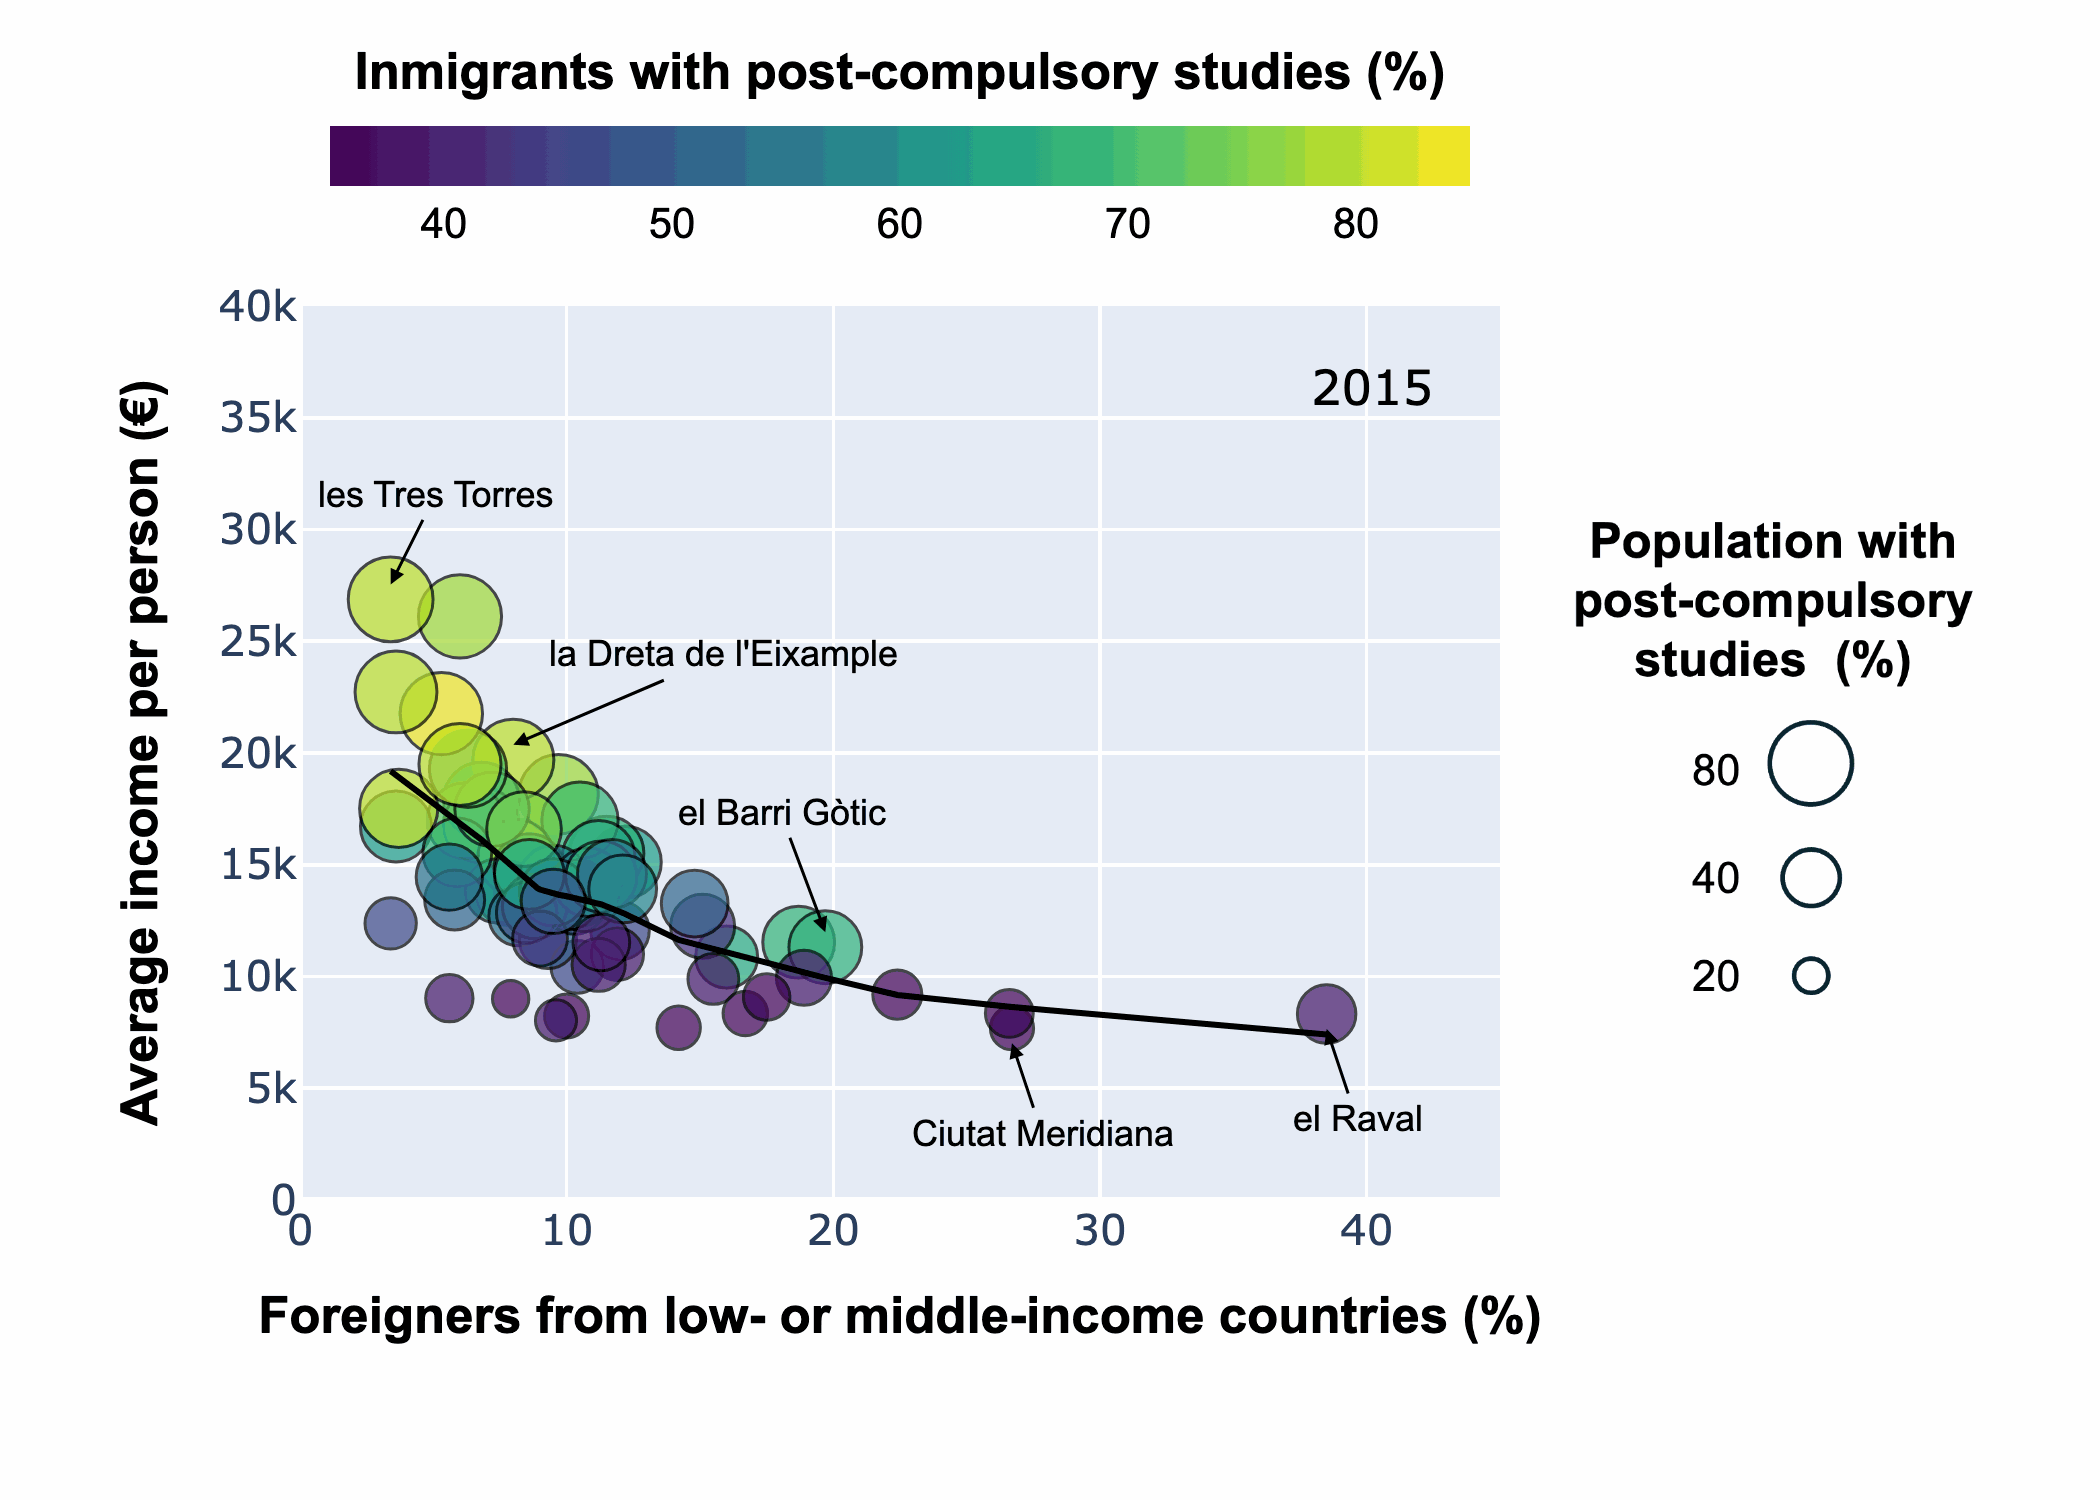

In [294]:
from PIL import Image
# We create a gif over the years
frames_dir="results_plot1"
files=sorted([f for f in os.listdir(frames_dir) if f.endswith(".png")])
frame_files=[os.path.join(frames_dir, f) for f in files]

frames=[Image.open(f) for f in frame_files]

frames[0].save(
    "plot1.gif",
    save_all=True,
    append_images=frames[1:],
    duration=500,   
    loop=0
)

from IPython.display import Image, display

display(Image(filename="plot1.gif"))

We can make this plot a bit clearer by agrupating the neighborhoods in districts:

In [315]:
from PIL import Image

# We create a folder to save the different plots
os.makedirs('results_plot1_districts', exist_ok=True)

# We charge the datasets
percentages=pd.read_csv('education_percentages_1997-2025.csv')
indices_df=pd.read_csv('indices_2015-2022.csv')

# We are going to order the districts (low-high rent)
district_order=[
    "Nou Barris",
    "Ciutat Vella",
    "Sant Andreu",
    "Sants-Montjuïc",
    "Horta-Guinardó",
    "Sant Martí",
    "Gràcia",
    "Eixample", 
    "Les Corts",
    "Sarrià-Sant Gervasi" 
]

# We create a plot for each year
years=[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

for year in years:

    # Filter the datasets in the year we are interested in
    education_year=percentages[percentages['Year_Reference']==year]
    indices_year=indices_df[indices_df['año']==year]

    # Combine the datasets at neighborhood level first
    df_combined_neighborhood=education_year.merge(
        indices_year,
        left_on='Neighborhood',
        right_on='barrios de Barcelona',
    )

    # We group all the raws that have the same district, obtaining the mean values of the data
    df_district = df_combined_neighborhood.groupby('District').agg({
        'extranjeros de países de renta baja o media (%)': 'mean',
        'renta media por persona (€)': 'mean',
        'Percentage_Postmandatory': 'mean',
        'Percentage_Postmandatory_Inmigrants': 'mean',
        'Total_Population': 'sum',
        'Total_Inmigrants': 'sum'
    }).reset_index()

    # Create the plot with districts instead of neighborhoods
    fig = px.scatter(
        df_district, 
        x="extranjeros de países de renta baja o media (%)",  
        y="renta media por persona (€)",         
        size="Percentage_Postmandatory",          
        color="Percentage_Postmandatory_Inmigrants",  
        hover_name="District",                
        hover_data={
            'Total_Population': ':,',             
            'Total_Inmigrants': ':,',             
            'Percentage_Postmandatory': ':.1f',   
            'extranjeros de países de renta baja o media (%)': ':.1f',
            'renta media por persona (€)': ':,.0f'
        },
        color_continuous_scale="Viridis",        
        trendline="lowess"
    )   

    # We add a number to each circle
    map_numbers={distrito: str(i+1) for i, distrito in enumerate(district_order)}
    df_district['District_Number'] = df_district['District'].map(map_numbers)

    # We situate the numbers around the circles
    up_numbers=['2','8','9']  
    down_numbers=['1', '5']  
    left_numbers=['10']  
    downleft_numbers=['3','7']  
    upright_numbers=['6','4']

    for index, row in df_district.iterrows():
        numero=row["District_Number"]
        
        if numero in up_numbers:
            yshift = 25  
            xshift=0
            color_texto = "black"
        elif numero in down_numbers:
            yshift = -20  
            xshift= 0
            color_texto = "black"
        elif numero in left_numbers:
            yshift = 0  
            xshift= -30
            color_texto = "black"
        elif numero in downleft_numbers:
            yshift = -20  
            xshift= -5
            color_texto = "black"
        else:
            yshift = 10  
            xshift= 15
            color_texto = "black"

        
        fig.add_annotation(
            x=row["extranjeros de países de renta baja o media (%)"],
            y=row["renta media por persona (€)"],
            text=numero,
            showarrow=False,
            yshift=yshift,
            xshift=xshift,
            font=dict(size=14, color=color_texto, family="Arial"),
        )


    # Configuration of the visualization

    fig.update_traces(
        line=dict(color="black", width=2),
    )

    fig.update_coloraxes(cmin=35, cmax=85)  

    fig.update_layout(
        xaxis=dict(
            title="Foreigners from low- or middle-income countries (%)",
            title_font=dict(size=17, family="Arial", color="black", weight="bold"),
            tickfont=dict(size=14),
            range=[0, 35]
        ),
        yaxis=dict(
            title="Average income per person (€)",
            title_font=dict(size=17, family="Arial", color="black", weight="bold"),
            tickfont=dict(size=14),
            range=[0, 30000]
        ),
        width=700,
        height=500,
        margin=dict(l=100, r=210, t=100, b=100),
        coloraxis_colorbar=dict(
            title=dict(
                text="Immigrants with post-compulsory studies (%)",
                side="top",
                font=dict(size=17, family="Arial", color="black", weight="bold"),
            ),
            tickfont=dict(family="Arial", size=14, color="black"),
            orientation="h",
            x=0.5,
            xanchor="center",
            y=1.3,
            yanchor="top",
            thickness=20,
            len=1
        )
    )

    # Let's add a personalized legend for the size of the circles
    img = Image.open("LEYENDA2.png")

    fig.add_layout_image(
        dict(
            source=img,
            xref="paper",
            yref="paper",
            x=1.07,     
            y=1.13,      
            sizex=0.45,  
            sizey=0.45,  
            xanchor="left",
            yanchor="top"
        )
    )

    # Let's add a legend for the districts
    legend="<br>".join([f"{i+1}. {distrito}" for i, distrito in enumerate(district_order)])

    fig.add_annotation(
        x=1.52,  
        y=-0.1,
        xref="paper",
        yref="paper",
        text=legend,
        showarrow=False,
        align="left",
        font=dict(size=16, family="Arial", color="black"),
        bordercolor="black",
        borderwidth=1,
        borderpad=10
    )

    # Let's add the year in each plot
    fig.add_annotation(
        x=0.95,
        y=0.95,
        xref="paper",
        yref="paper",
        text=f"{year}",
        showarrow=False,
        font=dict(size=16, color="black")
    )

    #fig.show()

    # Save the image in the folder
    fig.write_image(f'results_plot1_districts/grafico_distritos_{year}.png', scale=3)

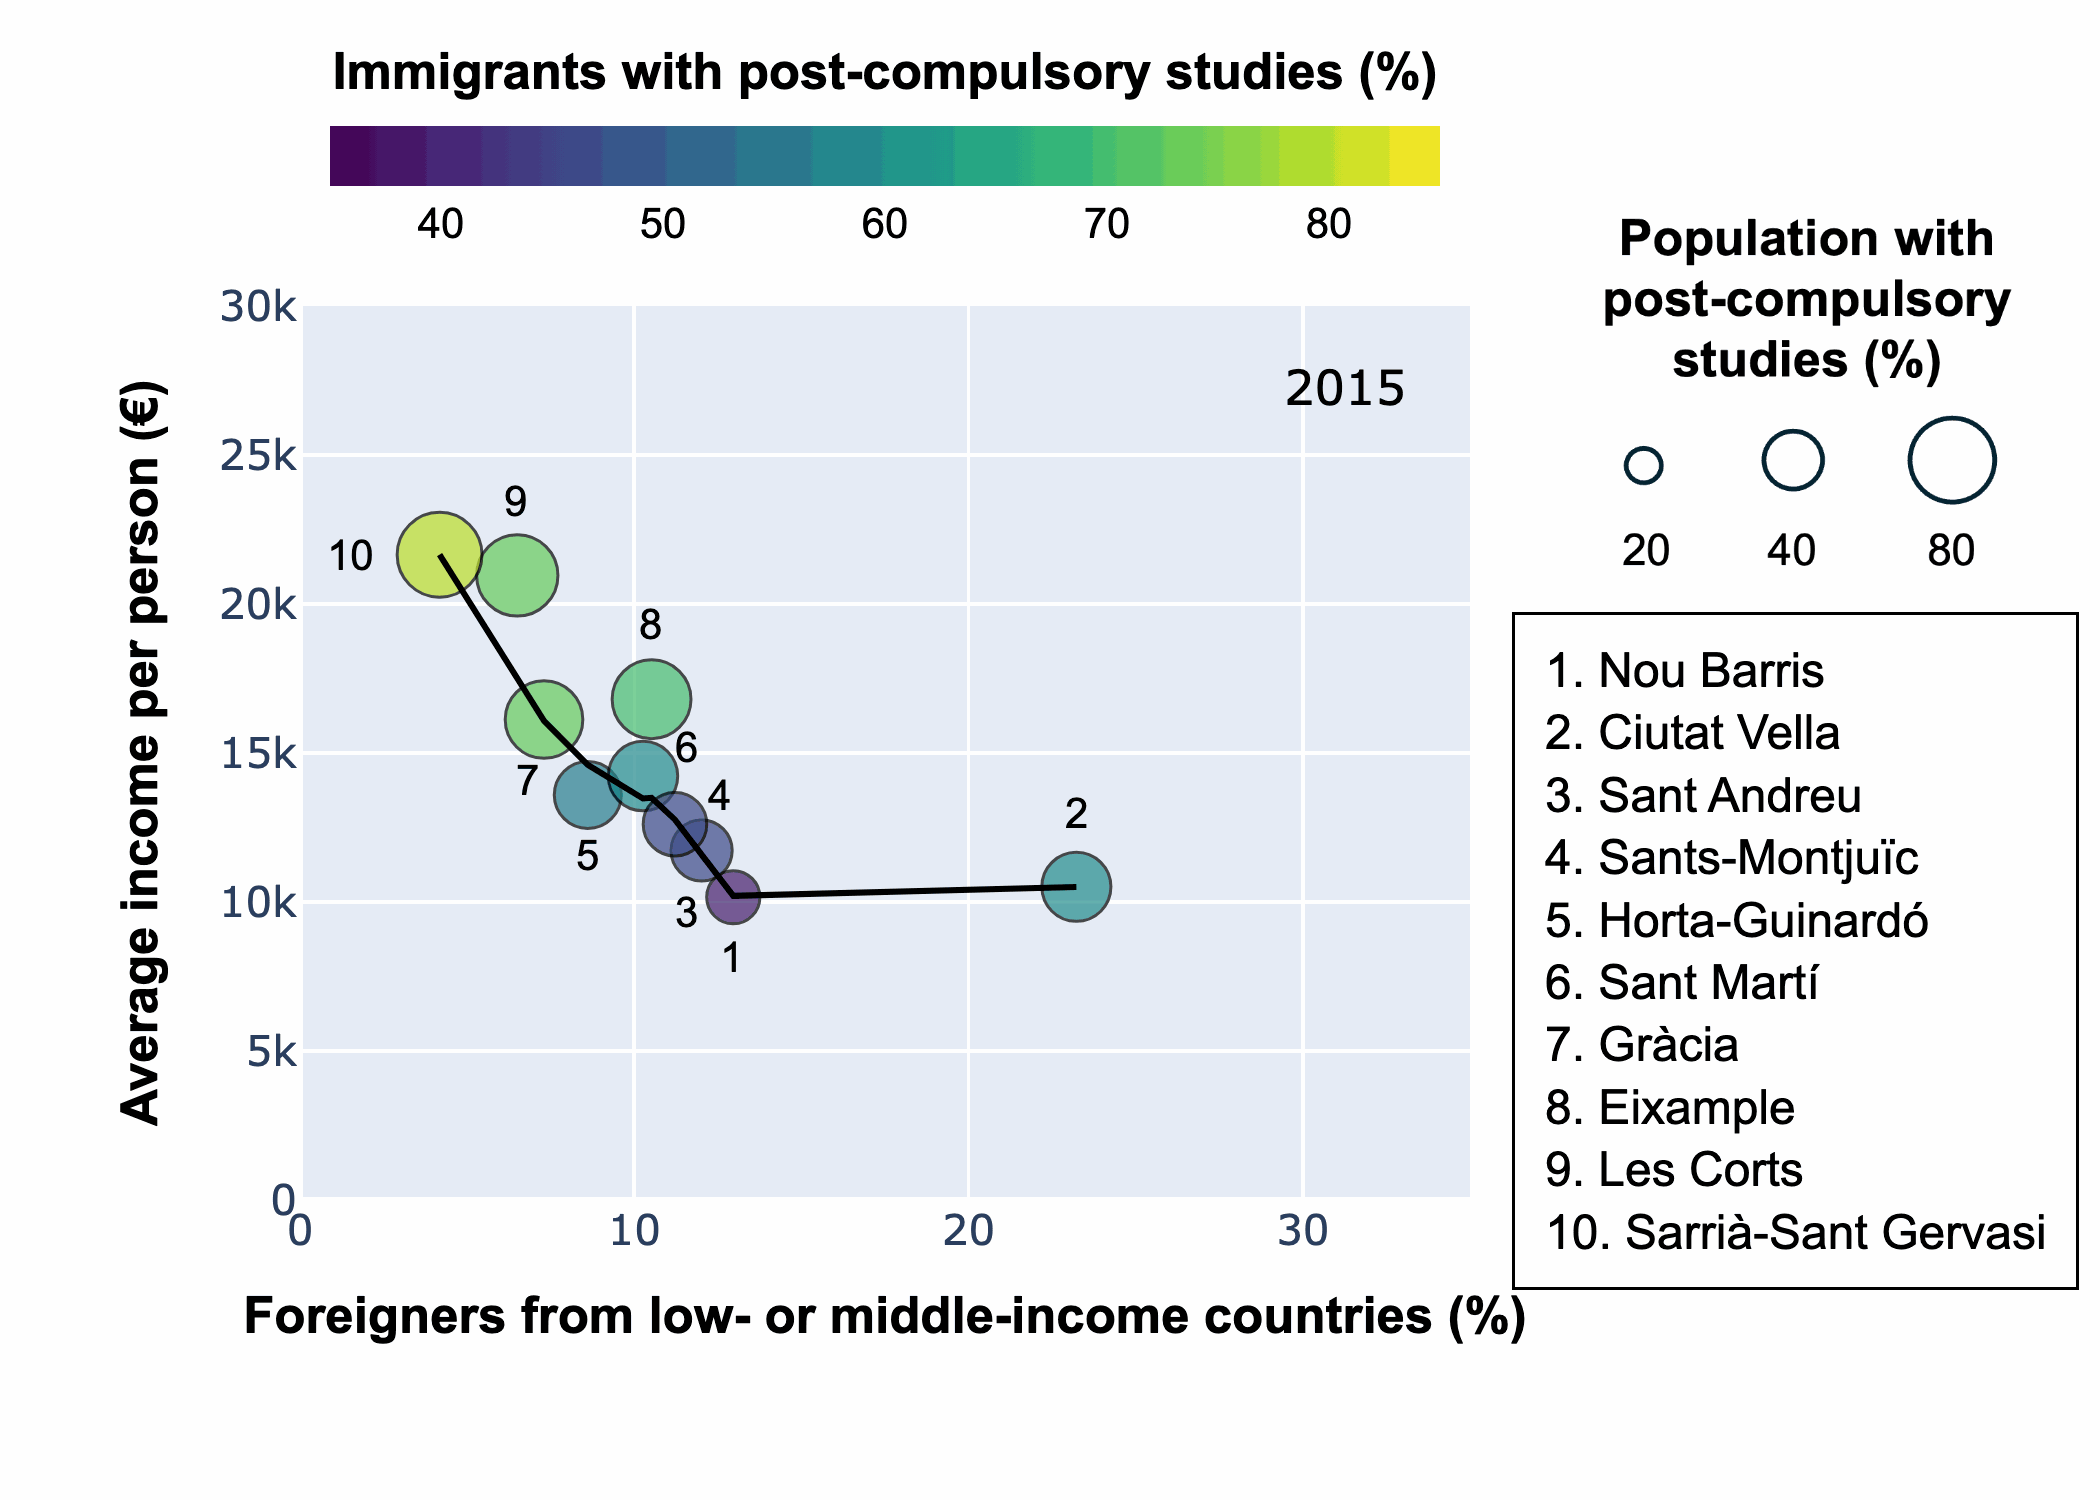

In [316]:
# We create a gif over the years
frames_dir="results_plot1_districts"
files=sorted([f for f in os.listdir(frames_dir) if f.endswith(".png")])
frame_files=[os.path.join(frames_dir, f) for f in files]

frames=[Image.open(f) for f in frame_files]

frames[0].save(
    "plot1_districts.gif",
    save_all=True,
    append_images=frames[1:],
    duration=500,   
    loop=0
)

from IPython.display import Image, display

display(Image(filename="plot1_districts.gif"))

### 2. HEAT MAP / VERTICAL BAR GRAPH 

Focusing only on Dataset 1, we can make an analysis of the level of education that population has in each district. We will represent this with a heat map. We first need to extract from the dataset the percentages of education per district.

In [317]:
# We read the data
df=pd.read_csv('education_1997-2025.csv')

# We group the population by years, districts and level of education
group=df.groupby(['Year_Reference', 'District', 'Education_Level'])['Value'].sum().reset_index()

# We df now the population by years and districts (all levels of education). We have to include also the not available.
total_per_district=group.groupby(['Year_Reference', 'District'])['Value'].sum().reset_index()
total_per_district.rename(columns={'Value': 'Total_District'}, inplace=True)

# We group both dataframes and obtain percentages
df=pd.merge(group, total_per_district, on=['Year_Reference', 'District'])
df['Percentage']=(df['Value']/df['Total_District'])*100
df

Year_Reference             District  \
0               1997         Ciutat Vella   
1               1997         Ciutat Vella   
2               1997         Ciutat Vella   
3               1997         Ciutat Vella   
4               1997         Ciutat Vella   
...              ...                  ...   
1735            2025  Sarrià-Sant Gervasi   
1736            2025  Sarrià-Sant Gervasi   
1737            2025  Sarrià-Sant Gervasi   
1738            2025  Sarrià-Sant Gervasi   
1739            2025  Sarrià-Sant Gervasi   

                                        Education_Level    Value  \
0                           Less than primary education  17478.0   
1                             Lower secondary education  11649.0   
2                                         Not available   2049.0   
3                                     Primary education  25076.0   
4                                    Tertiary education   6476.0   
...                                                 ...      ...   
1735                          Lower secondary education  15231.0   
1736                                      Not available    288.0   
1737                                  Primary education   7760.0   
1738                                 Tertiary education  72830.0   
1739  Upper secondary or post-secondary non-tertiary...  34033.0   

      Total_District  Percentage  
0            73544.0   23.765365  
1            73544.0   15.839497  
2            73544.0    2.786087  
3            73544.0   34.096595  
4            73544.0    8.805613  
...              ...         ...  
1735        130467.0   11.674216  
1736        130467.0    0.220745  
1737        130467.0    5.947864  
1738        130467.0   55.822545  
1739        130467.0   26.085524  

[1740 rows x 6 columns]

We now can create the plot.

In [318]:
# We order the districts from low to high rent
district_order=[
    "Nou Barris",
    "Ciutat Vella", 
    "Sant Andreu",
    "Sants-Montjuïc",
    "Horta-Guinardó",
    "Sant Martí",
    "Gràcia",
    "Eixample", 
    "Les Corts",
    "Sarrià-Sant Gervasi" 
]

# We order the education levels from high to low
education_order=[
    'Tertiary education',
    'Upper secondary or post-secondary non-tertiary education',
    'Lower secondary education',
    'Primary education', 
    'Less than primary education' 
]

# We change to shorter names
names_y=[
    'Tertiary',
    'Upper secondary',
    'Lower secondary',
    'Primary',
    'Less than primary'
]

# We create a folder to save the plots
os.makedirs("heatmaps_education", exist_ok=True)

# We create a list with the years
years=sorted(df['Year_Reference'].unique())

for year in years:

    # We obtain the df for that year
    df_year=df[df['Year_Reference']==year].copy()
    
    # We redistribute the dataframe for the heatmap
    heatmap_df = df_year.pivot_table(
        index='Education_Level', #rows
        columns='District',
        values='Percentage',
    ).fillna(0)
    
    # We don't want to plot the not available
    if 'Not available' in heatmap_df.index:
        heatmap_df=heatmap_df.drop('Not available')
    
    # We reorder the axis values
    heatmap_df=heatmap_df.reindex(education_order)
    heatmap_df=heatmap_df[district_order]
    
    # We create the heatmap
    plt.figure(figsize=(10, 5))
    ax=sns.heatmap(
        heatmap_df,
        annot=True,
        fmt='.1f',
        cmap='viridis',
        linewidths=0.5,
        cbar_kws={'label': 'Porcentaje (%)'},
        vmin=0,  
        vmax=60   
    )
    cbar=ax.collections[0].colorbar
    cbar.set_label('Percentage (%)', fontweight='bold')

    plt.text(
        0.99, 1.05,               
        f"{year}",            
        ha='right', va='center',
        transform=plt.gca().transAxes,
        fontsize=12,
        fontweight='bold'
    )
    
    plt.xlabel('District (from low to high rent)', fontsize=12, fontweight='bold')
    plt.ylabel('Educational level', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(ticks=np.arange(len(education_order)) + 0.5, labels=names_y, rotation=0)
    plt.tight_layout()
    
    # We save the plot in the folder
    plt.savefig(os.path.join("heatmaps_education", f"heatmap_education_{year}.png"), dpi=300, bbox_inches='tight')
    plt.close()

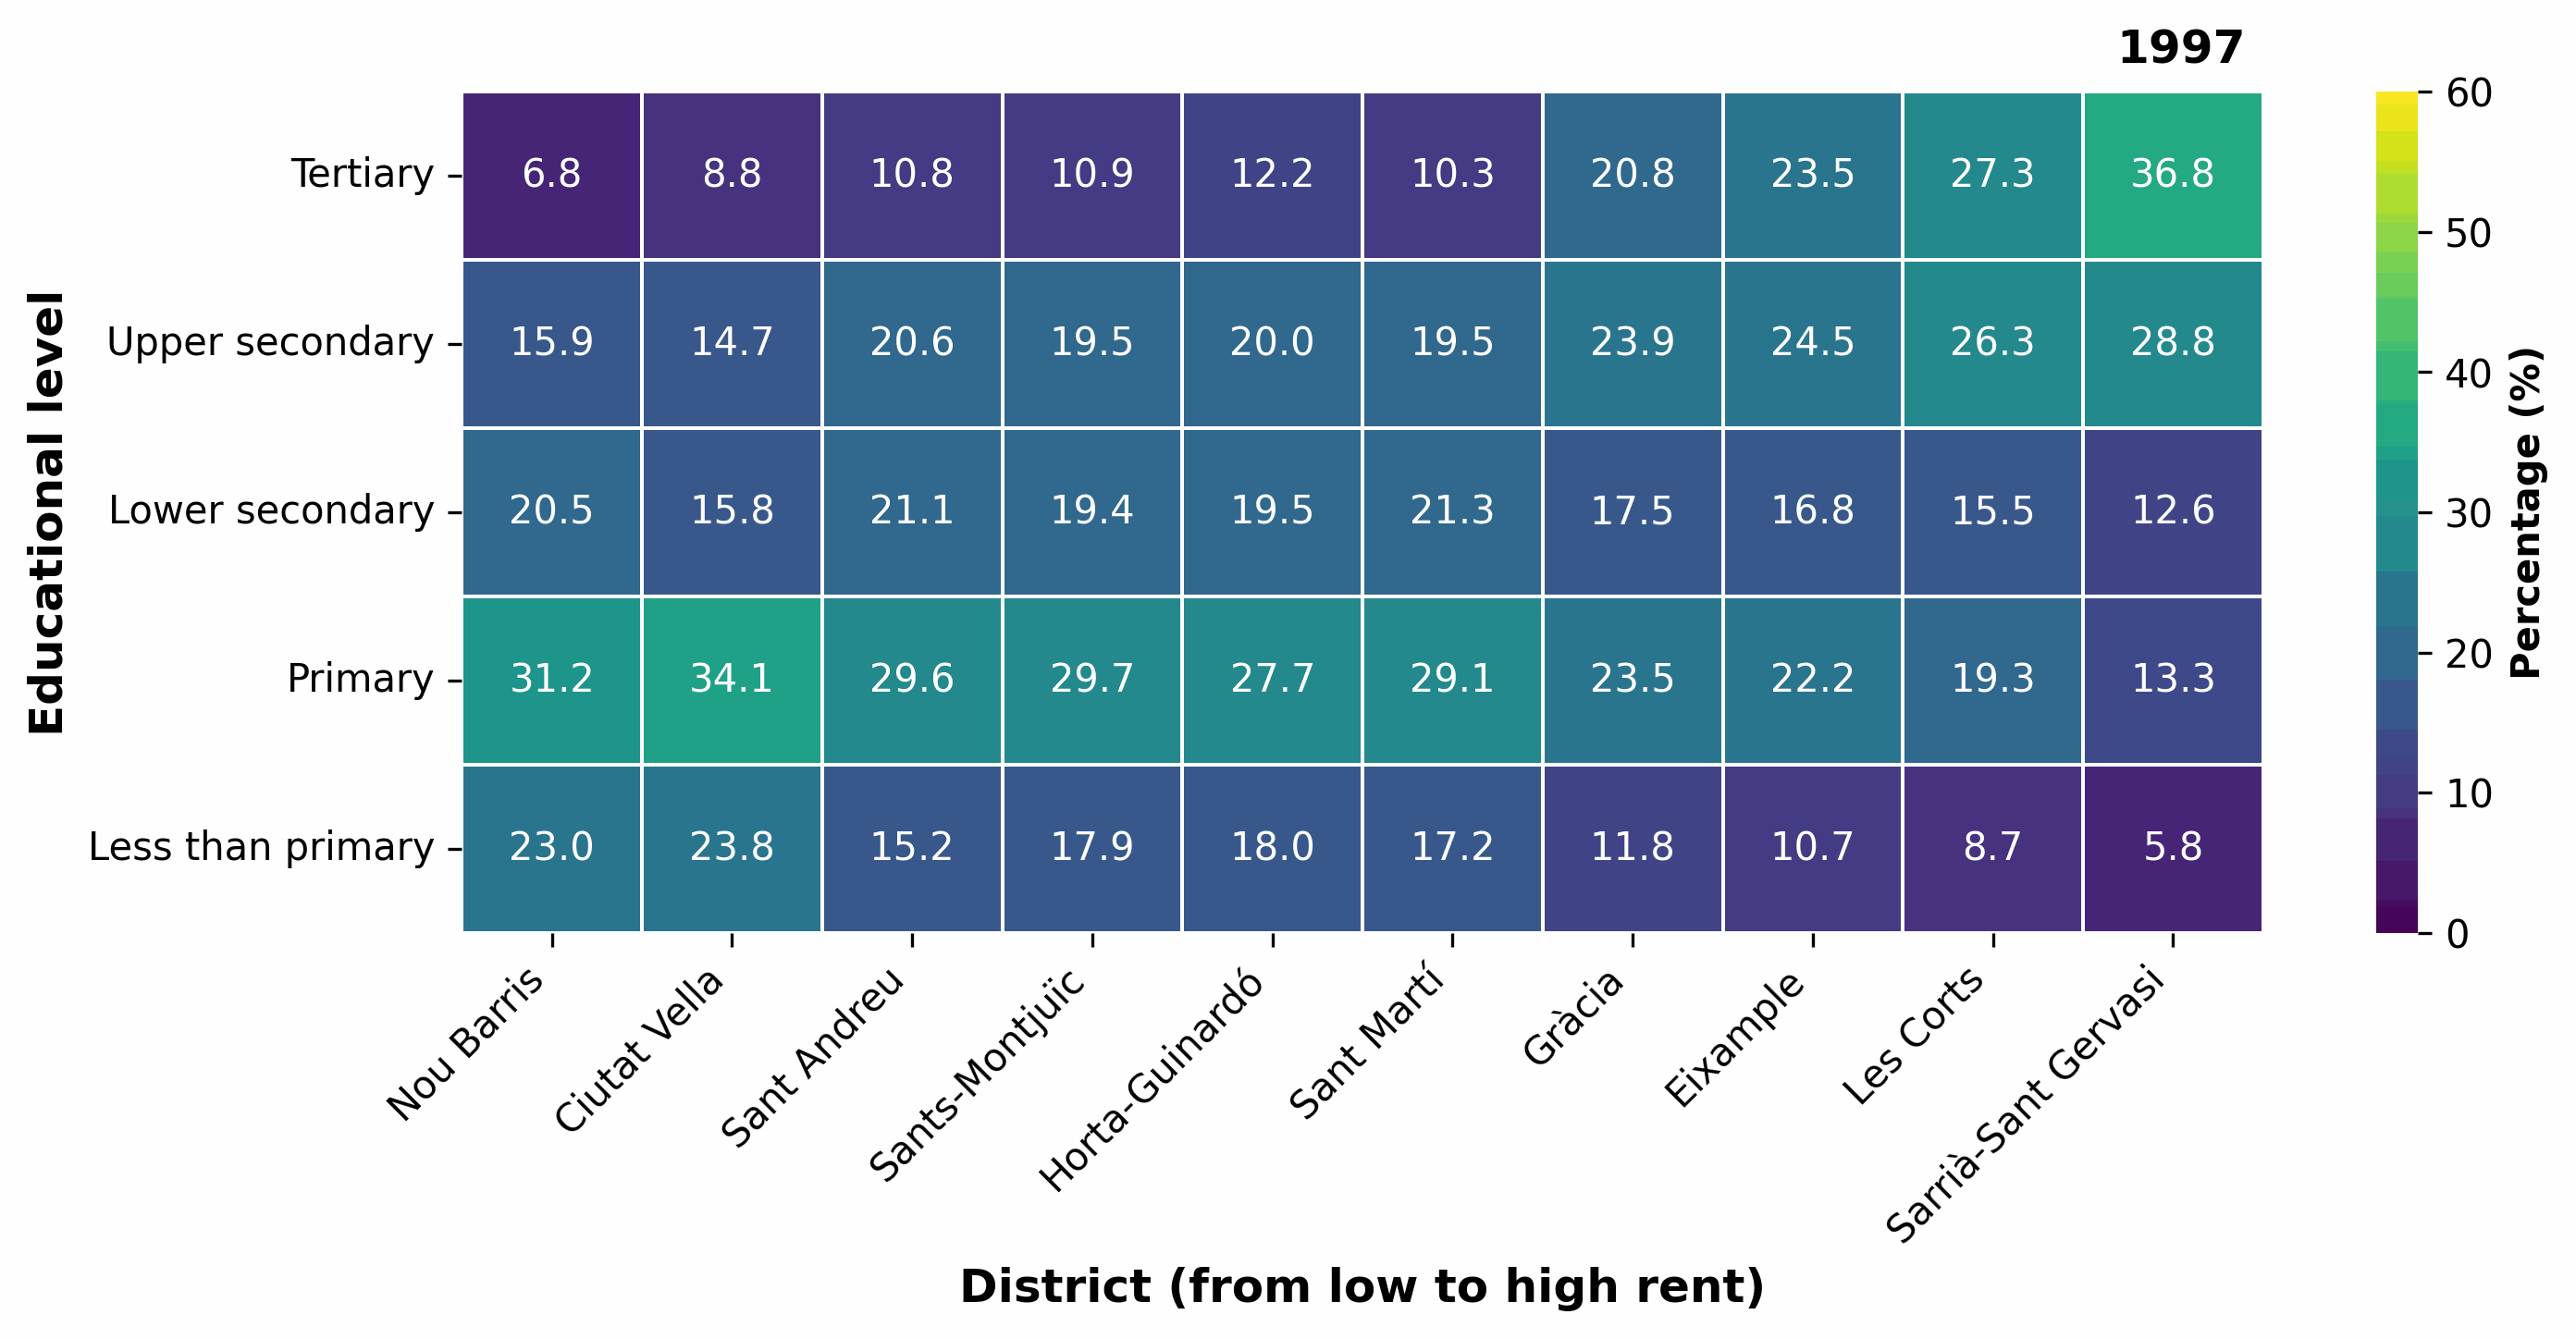

In [319]:
from PIL import Image

# We create a gif over the years
frames_dir="heatmaps_education"
files=sorted([f for f in os.listdir(frames_dir) if f.endswith(".png")])
frame_files=[os.path.join(frames_dir, f) for f in files]

frames=[Image.open(f) for f in frame_files]

frames[0].save(
    "heatmap.gif",
    save_all=True,
    append_images=frames[1:],
    duration=500,   
    loop=0
)

from IPython.display import Image, display

display(Image(filename="heatmap.gif"))

We can also represent this information with a bar map:

In [320]:
# Folder to save the plots
os.makedirs("education_per_districts_barmap", exist_ok=True)

# Let's order the districts from low to high rent
order_districts=[
    "Nou Barris",
    "Ciutat Vella", 
    "Sant Andreu",
    "Sants-Montjuïc",
    "Horta-Guinardó",
    "Sant Martí",
    "Gràcia",
    "Eixample", 
    "Les Corts",
    "Sarrià-Sant Gervasi" 
]

# Let's order the education levels from low to high
orden_educacion=[
    'Not available',
    'Less than primary education',
    'Primary education', 
    'Lower secondary education',
    'Upper secondary or post-secondary non-tertiary education',
    'Tertiary education'
]

# We change to shorter names
names_y={
    'Not available':'Not available',
    'Tertiary education': 'Tertiary',
    'Upper secondary or post-secondary non-tertiary education': 'Upper secondary',
    'Lower secondary education': 'Lower secondary',
    'Primary education': 'Primary',
    'Less than primary education': 'Less than primary'
}

viridis_colors=plt.cm.viridis(np.linspace(0, 1, 6))
colors=[viridis_colors[0],viridis_colors[1], viridis_colors[2],viridis_colors[3], viridis_colors[4],viridis_colors[5]]

# List with the years
years=sorted(df['Year_Reference'].unique())

for year in years:

    df_year = df[df['Year_Reference']==year].copy()
    
    # We reorganize the dataframe
    df_barmap=df_year.pivot_table(
        index='District',
        columns='Education_Level',
        values='Percentage',
    ).fillna(0)
    
    # We reorder from low to high rent
    df_barmap=df_barmap.reindex(order_districts)
    df_barmap=df_barmap[orden_educacion]
    
    # We create the plot
    fig, ax=plt.subplots(figsize=(10, 5))
    bottoms=np.zeros(len(df_barmap))
    for i, column in enumerate(df_barmap.columns):
        ax.bar(df_barmap.index, df_barmap[column], bottom=bottoms,
               label=column, color=colors[i], alpha=0.8)
        bottoms+=df_barmap[column]
    
    ax.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Districts (from low to high rent)', fontsize=1, fontweight='bold')
    
    leg=ax.legend(
        [names_y.get(l, l) for l in df_barmap.columns], 
        bbox_to_anchor=(1.03, 1), 
        loc='upper left', 
        title='Educational level', 
        title_fontsize=12, 
        frameon=False
    )
    leg.get_title().set_fontweight('bold')

    plt.text(
        0.99, 1.05,               
        f"{year}",            
        ha='right', va='center',
        transform=plt.gca().transAxes,
        fontsize=12,
        fontweight='bold'
    )
    
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y',linestyle='--', alpha=0.5)
    plt.tight_layout()
    
    # We save the plot
    plt.savefig(os.path.join("education_per_districts_barmap", f"education_per_district_{year}.png"), dpi=300, bbox_inches='tight')
    plt.close()


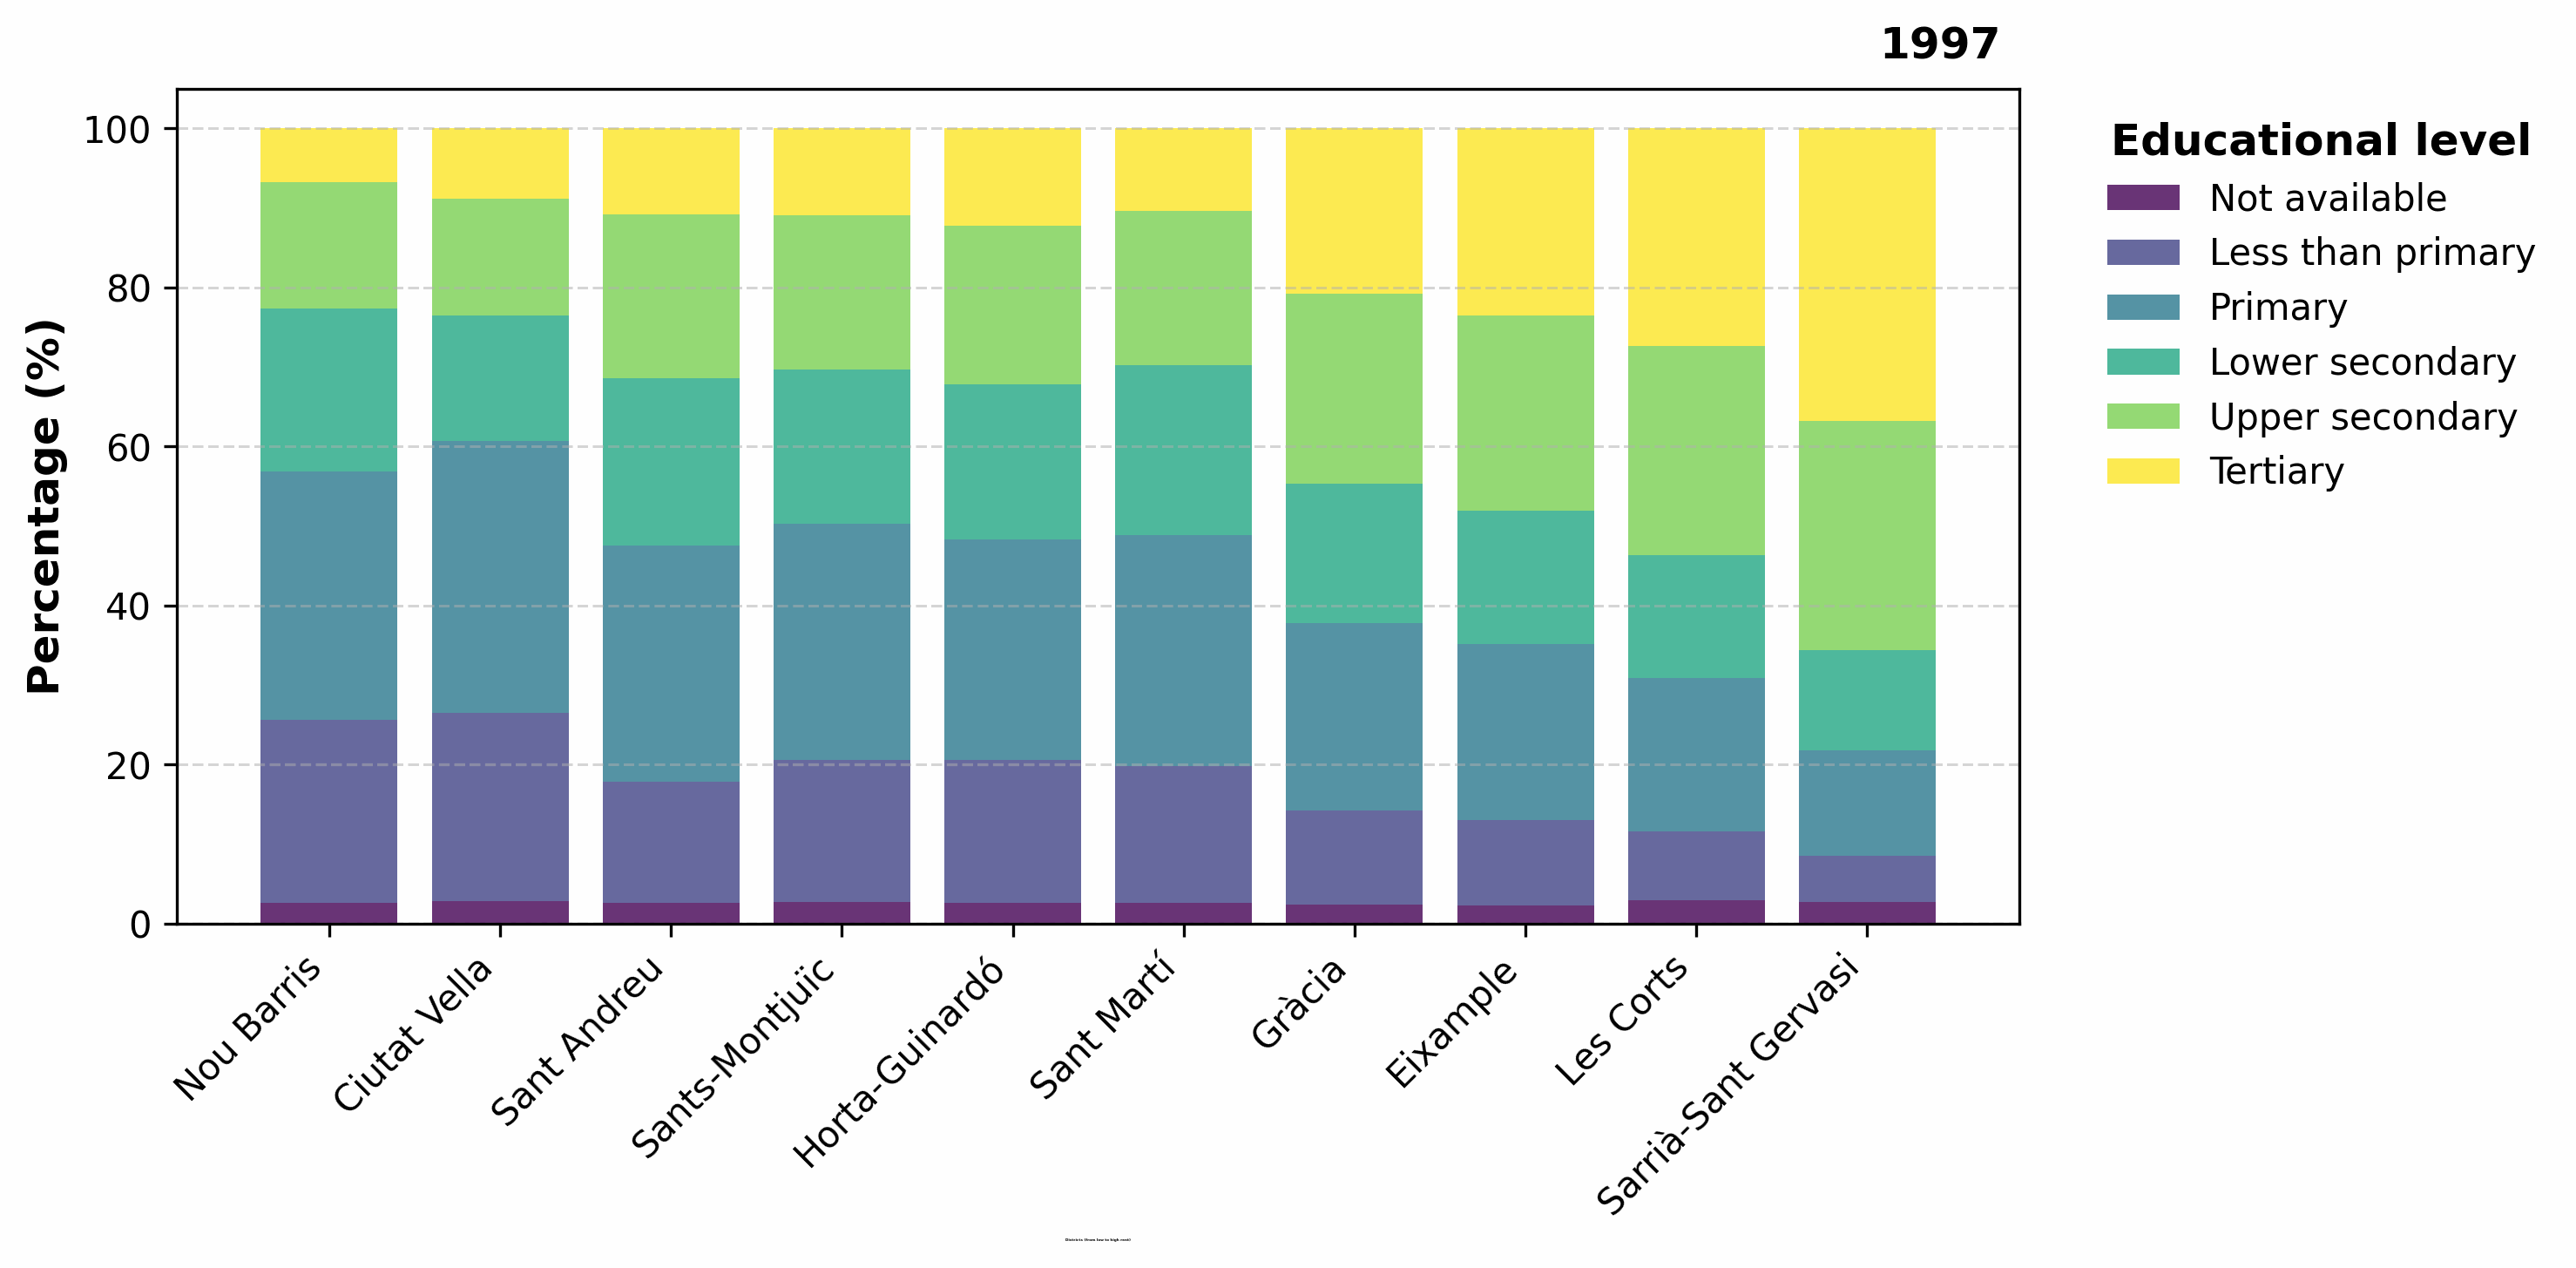

In [321]:
from PIL import Image

# We create a gif over the years
frames_dir="education_per_districts_barmap"
files=sorted([f for f in os.listdir(frames_dir) if f.endswith(".png")])
frame_files=[os.path.join(frames_dir, f) for f in files]

frames=[Image.open(f) for f in frame_files]

frames[0].save(
    "education_per_districts.gif",
    save_all=True,
    append_images=frames[1:],
    duration=500,   
    loop=0
)

from IPython.display import Image, display

display(Image(filename="education_per_districts.gif"))

### 3. HORIZONTAL BAR GRAPH

For this representation we will be using Dataset 3. We want to know where are the inmigrants with postmandatory studies from and in which districts of Barcelona are they living.

In [322]:
# We create a folder to save the different plots
os.makedirs('results_plot5', exist_ok=True)

# We read the data
df=pd.read_csv('education_continents_1997-2025.csv')

# We delete the 'no consta' because they are negligible
df=df[~df["Titulación académica"].str.strip().str.lower().eq("no consta")]
df=df[~df["Continente"].str.strip().str.lower().eq("no consta")]

# Let's group America and Oceania
df["group_continent"]=df["Continente"].replace({
    "América": "América-Oceanía",
    "Oceanía": "América-Oceanía"
})

# We select the postmandatory levels using keywords
keywords=["Bachillerato", "COU", "FPII", "CFGM", "grado medio", "universitarios", "CFGS"]
mask=df["Titulación académica"].str.contains("|".join(keywords), case=False, na=False)
df_educated=df[mask].copy()

# We create a plot for each year
years=[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Viridis palette
viridis_colors=plt.cm.viridis(np.linspace(0, 1, 4))

# Color mapping
color_map={
    "África": viridis_colors[0],
    "Asia": viridis_colors[1],
    "América-Oceanía": viridis_colors[2],
    "Europa": viridis_colors[3]
}

# Legend
legend=[
    Patch(facecolor=viridis_colors[0], label="Africa"),
    Patch(facecolor=viridis_colors[1], label="Asia"),
    Patch(facecolor=viridis_colors[2], label="Americas-Oceania"),
    Patch(facecolor=viridis_colors[3], label="Europe")
]

district_order=[
    "Nou Barris", "Ciutat Vella", "Sant Andreu", "Sants-Montjuïc",
    "Horta-Guinardó", "Sant Martí", "Gràcia", "Eixample",
    "Les Corts", "Sarrià-Sant Gervasi"
]

for year in years:

    df_year=df_educated[df_educated["Año"]==year].copy()
    
    # Pivot table
    pivot_dc=df_year.pivot_table(
        index="Territorio",
        columns="group_continent",
        values="Poblacion",
        aggfunc="sum"
    ).fillna(0)

    # Reorder columns
    order=["África", "Asia", "América-Oceanía", "Europa"]
    pivot_dc=pivot_dc[[c for c in order if c in pivot_dc.columns]]
    
    # Reorder districts
    pivot_dc=pivot_dc.reindex(district_order)
    
    # Percentages
    row_sums=pivot_dc.sum(axis=1).replace(0, np.nan)
    pivot_pct=pivot_dc.div(row_sums, axis=0).fillna(0)*100
    
    fig, ax=plt.subplots(figsize=(10, 6))
    left=np.zeros(len(pivot_pct))
    y=np.arange(len(pivot_pct))
    
    # Plot horizontal bars
    for col in pivot_pct.columns:
        vals=pivot_pct[col].values
        ax.barh(y, vals, left=left, color=color_map[col], label=col)
        left+=vals
    
    ax.set_yticks(y)
    ax.set_yticklabels(pivot_pct.index)
    ax.set_xlabel("Population (%)", fontsize=12, fontweight='bold')
    ax.set_ylabel("Districts (low to high rent)", fontsize=12, fontweight='bold')
    ax.set_xlim(0, 100)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
    ax.xaxis.grid(True, linestyle='--', alpha=0.5)
    ax.legend(handles=legend, bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)
    
    # Add year annotation
    ax.text(0.99, 1.05, f'{year}', transform=ax.transAxes, fontsize=12,
            fontweight='bold', verticalalignment='top', horizontalalignment='right')
    
    plt.tight_layout()
    fig.savefig(f'results_plot5/continentes_{year}_horiz.png', dpi=300, bbox_inches='tight')
    plt.close()

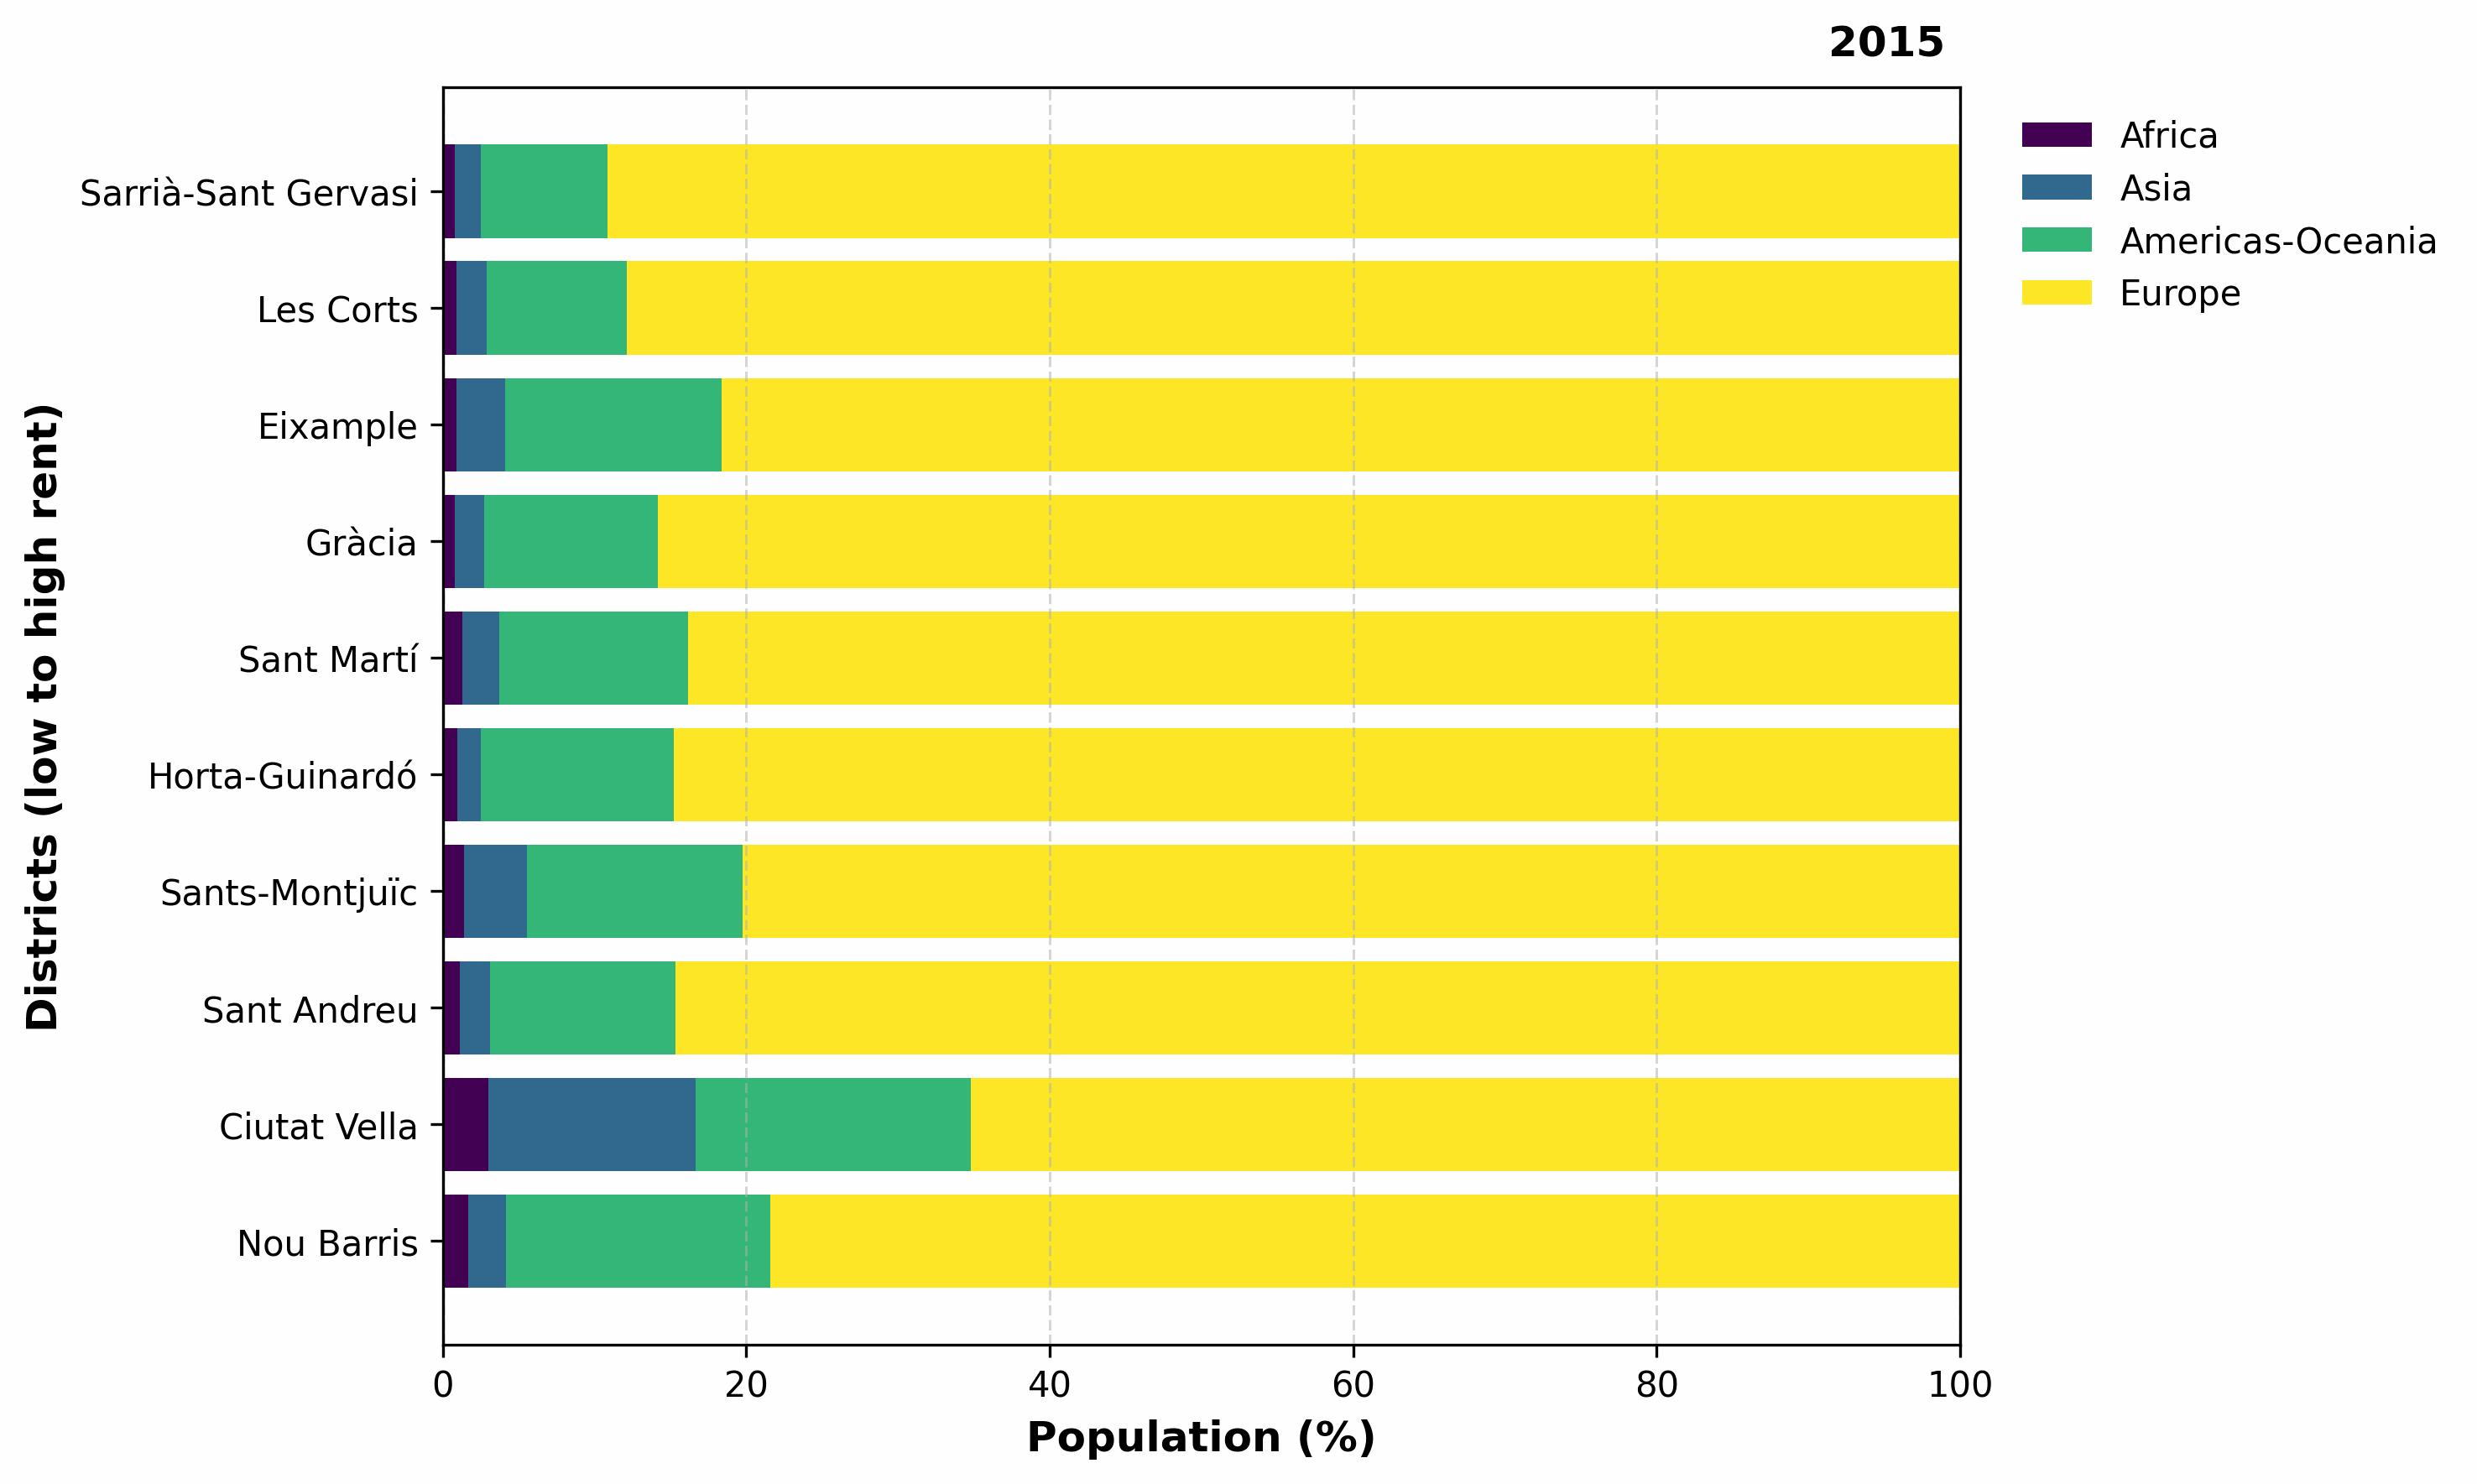

In [323]:
from PIL import Image

# We create a gif over the years
frames_dir="results_plot5"
files=sorted([f for f in os.listdir(frames_dir) if f.endswith(".png")])
frame_files=[os.path.join(frames_dir, f) for f in files]

frames=[Image.open(f) for f in frame_files]

frames[0].save(
    "plot5.gif",
    save_all=True,
    append_images=frames[1:],
    duration=500,   
    loop=0
)

from IPython.display import Image, display

display(Image(filename="plot5.gif"))